In [1]:
import numpy as np
import matplotlib.pyplot as plt
import solver.exact_solve as exact
import solver.piqs_solve as piqs
import utils
import qutip

utils imported


In [2]:
pop, det, new_k = utils.gen_rand_pop(int(1e5), 200, 1600, 10)
pop_dis = pop/np.sum(pop)
new_k

153

[Text(0, 0.5, 'sz'), Text(0.5, 0, 'time us')]

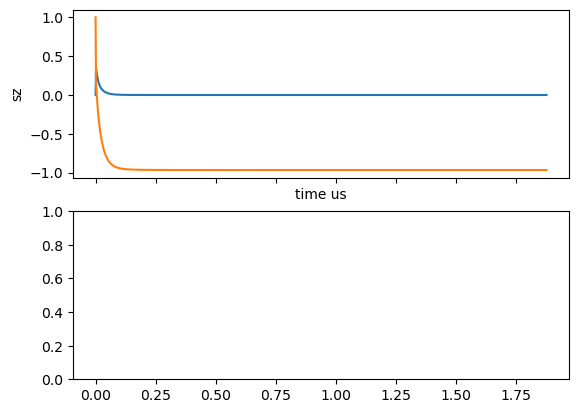

In [5]:
gk = 1.6
delta_c = 0
kappa = 160
tlist = np.linspace(0,3/gk, int(1e3))
out_ada = np.zeros(int(1e3))
out_sz = np.zeros(int(1e3))
for i in range(new_k):
    delta_a = det[i]
    sys = exact.sys(1,20, delta_a, delta_c, delta_a, gk)
    sys_out = sys.run_mesolve(tlist, [np.sqrt(kappa)*sys.a], [sys.ad*sys.a, sys.sz], silent=True)
    out_ada += pop_dis[i] * sys_out.expect[0]
    out_sz += pop_dis[i] * sys_out.expect[1]
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(tlist, out_ada)
ax[0].set(ylabel="ada")
ax[1].plot(tlist, out_sz)
ax[1].set(ylabel="sz", xlabel="time us")

In [3]:
from qutip.piqs import *
N = 20
ntls = N
nds = num_dicke_states(N)
print("The number of Dicke states is", nds)
[jx, jy, jz] = jspin(N)
jp = jspin(N, "+")
jm = jspin(N, "-")
system = Dicke(N = N)

The number of Dicke states is 121


In [5]:
a = 1/np.sqrt(2)
b = 1/np.sqrt(2)
css_symmetric = css(N, a, b)
css_antisymmetric = css(N, a,-b)
excited_ = dicke(N, N/2,N/2)
superradiant = dicke(N,N/2,0)
subradiant = dicke(N,N/2,-N/2)
ground_ = dicke(N,N/2,-N/2)
ghz_ = ghz(N)

In [7]:
gE = 0 # local emission
gD = 0 # local dephasing
gP = 0 # local pumping
gCE = 1 # collective emission
gCD = 0 # collective dephasing
gCP = 0 # collective pumping
w0 = 1  # bare frequency
wi = 0  # coherent drive frequency

# spin hamiltonian
h0 = w0 * jz
hint = wi * jx
h = h0 #+ hint

#set initial conditions for spins by initializing the system and building the Liouvillian matrix
system = Dicke(hamiltonian = h, 
               N = N, 
               emission = gE, 
               pumping = gP, 
               dephasing = gD, 
               collective_emission = gCE, 
               collective_pumping = gCP, 
               collective_dephasing = gCD)
lind = system.lindbladian()
liouv = system.liouvillian()
# parameters for the time integration of the dynamics
nt = 1001
td0 = np.log(N)/(N*gCE) # delay time is used as a reference
tmax = 10 * td0
t = np.linspace(0, tmax, nt)

# initial states 
rho01 = excited_
rho02 = superradiant
rho03 = css_symmetric
rho04 = css_antisymmetric
rho05 = subradiant
rho06 = ghz_

#Excited
result1 = qutip.mesolve(liouv, rho01, t, [], e_ops = [jz, jp*jm, jz**2], 
                  options = qutip.Options(store_states=True))
rhot1 = result1.states
jz_t1 = result1.expect[0]
jpjm_t1 = result1.expect[1]
jz2_t1 = result1.expect[2]

#Superradiant
result2 = qutip.mesolve(liouv, rho02, t, [], e_ops = [jz, jp*jm, jz**2], 
                  options = qutip.Options(store_states=True))
rhot2 = result2.states
jz_t2 = result2.expect[0]
jpjm_t2 = result2.expect[1]
jz2_t2 = result2.expect[2]

#CSS Symmetric
result3 = qutip.mesolve(liouv, rho03, t, [], e_ops = [jz, jp*jm, jz**2], 
                  options = qutip.Options(store_states=True))
rhot3 = result3.states
jz_t3 = result3.expect[0]
jpjm_t3 = result3.expect[1]
jz2_t3 = result3.expect[2]

#CSS Antisymmetric
result4 = qutip.mesolve(liouv, rho04, t, [], e_ops = [jz, jp*jm, jz**2], 
                  options = qutip.Options(store_states=True))
rhot4 = result4.states
jz_t4 = result4.expect[0]
jpjm_t4 = result4.expect[1]
jz2_t4 = result4.expect[2]

#Subradiant
result5 = qutip.mesolve(liouv, rho05, t, [], e_ops = [jz, jp*jm, jz**2], 
                  options = qutip.Options(store_states=True))
rhot5 = result5.states
jz_t5 = result5.expect[0]
jpjm_t5 = result5.expect[1]
jz2_t5 = result5.expect[2]

#GHz
result6 = qutip.mesolve(liouv, rho06, t, [], e_ops = [jz, jp*jm, jz**2], 
                  options = qutip.Options(store_states=True))
rhot6 = result6.states
jz_t6 = result6.expect[0]
jpjm_t6 = result6.expect[1]
jz2_t6 = result6.expect[2]

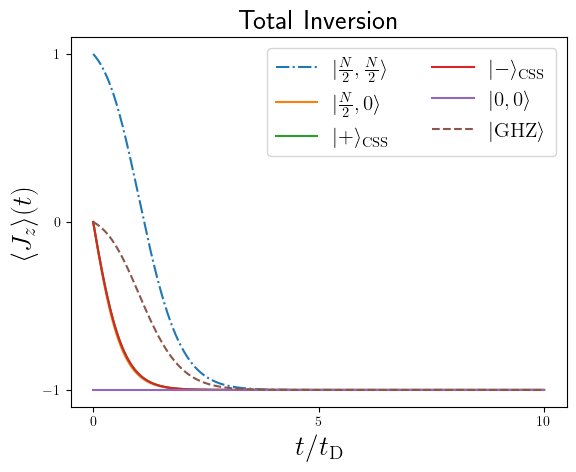

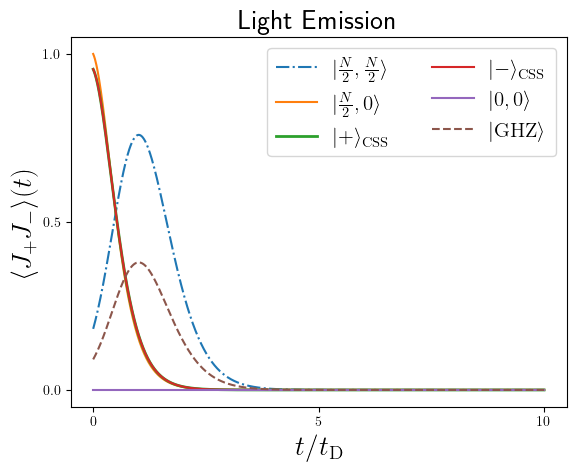

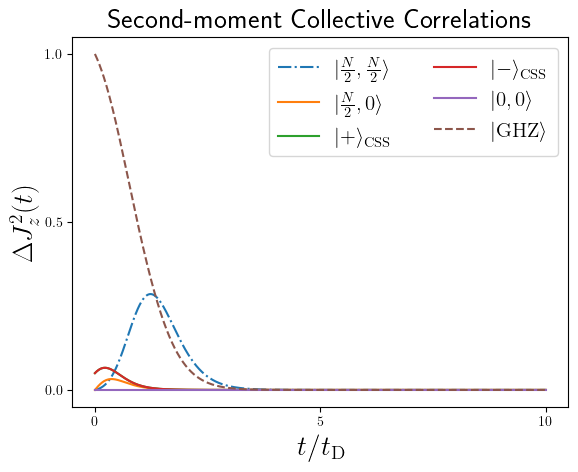

In [8]:
jmax = (0.5 * N)
j2max = (0.5 * N + 1) * (0.5 * N)

label_size = 20
label_size2 = 20
label_size3 = 20
label_size4 = 15
plt.rc('text', usetex = True)


fig1 = plt.figure()
plt.plot(t/td0, jz_t1/jmax, '-.', label = r"$|\frac{N}{2},\frac{N}{2}\rangle$")
plt.plot(t/td0, jz_t2/jmax, '-', label = r"$|\frac{N}{2},0\rangle$")
plt.plot(t/td0, jz_t3/jmax, '-', label = r"$|+\rangle_\mathrm{CSS}$")
plt.plot(t/td0, jz_t4/jmax, '-', label = r"$|-\rangle_\mathrm{CSS}$")
plt.plot(t/td0,jz_t5/jmax, '-', label = r"$|0,0\rangle$")
plt.plot(t/td0,jz_t6/jmax, '--', label = r"$|\mathrm{GHZ}\rangle$")
#plt.ylim([-1,1])
plt.xlabel(r'$t/t_\mathrm{D}$', fontsize = label_size3)
plt.ylabel(r'$\langle J_{z} \rangle(t)$', fontsize = label_size3)
plt.xticks([0,(tmax/2)/td0,tmax/td0])
plt.yticks([-1,0,1])
plt.legend(fontsize = label_size4, ncol = 2)

# plot
plt.title(r'Total Inversion', fontsize = label_size3)    
plt.show()
plt.close()

fig2 = plt.figure()
plt.plot(t/td0, jpjm_t1/j2max, '-.', label = r"$|\frac{N}{2},\frac{N}{2}\rangle$")
plt.plot(t/td0, jpjm_t2/j2max, '-', label = r"$|\frac{N}{2},0\rangle$")
plt.plot(t/td0, jpjm_t3/j2max, '-', label = r"$|+\rangle_\mathrm{CSS}$", linewidth = 2)
plt.plot(t/td0, jpjm_t4/j2max, '-', label = r"$|-\rangle_\mathrm{CSS}$")
plt.plot(t/td0,jpjm_t5/j2max, '-', label = r"$|0,0\rangle$")
plt.plot(t/td0,jpjm_t6/j2max, '--', label = r"$|\mathrm{GHZ}\rangle$")
#plt.ylim([0,1])
plt.xticks([0,(tmax/2)/td0,tmax/td0])
plt.yticks([0,0.5,1])
plt.xlabel(r'$t/t_\mathrm{D}$', fontsize = label_size3)
plt.ylabel(r'$\langle J_{+}J_{-}\rangle(t)$', fontsize = label_size3)
plt.legend(fontsize = label_size4, ncol = 2)

# plot
plt.title(r'Light Emission', fontsize = label_size3)    
plt.show()
plt.close()

fig3 = plt.figure()
djz1 = (jz2_t1- jz_t1**2)/jmax**2
djz2 = (jz2_t2- jz_t2**2)/jmax**2
djz3 = (jz2_t3- jz_t3**2)/jmax**2
djz4 = (jz2_t4- jz_t4**2)/jmax**2
djz5 = (jz2_t5- jz_t5**2)/jmax**2
djz6 = (jz2_t6- jz_t6**2)/jmax**2

plt.plot(t/td0, djz1, '-.', label = r"$|\frac{N}{2},\frac{N}{2}\rangle$")
plt.plot(t/td0, djz2, '-', label = r"$|\frac{N}{2},0\rangle$")
plt.plot(t/td0, djz3, '-', label = r"$|+\rangle_\mathrm{CSS}$")
plt.plot(t/td0, djz4, '-', label = r"$|-\rangle_\mathrm{CSS}$")
plt.plot(t/td0, djz5, '-', label = r"$|0,0\rangle$")
plt.plot(t/td0, djz6, '--', label = r"$|\mathrm{GHZ}\rangle$")
#plt.ylim([-1,1])
plt.xticks([0,(tmax/2)/td0,tmax/td0])
plt.yticks([0,0.5,1])
plt.xlabel(r'$t/t_\mathrm{D}$', fontsize = label_size3)
plt.ylabel(r'$\Delta J_{z}^2(t)$', fontsize = label_size3)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
plt.legend(fontsize = label_size4, ncol = 2)
plt.title(r'Second-moment Collective Correlations', fontsize = label_size3)
plt.show()
plt.close()